# Gamma Distribution

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import pandas as pd

## Density Function

The **gamma distribution** (with parameters $\alpha$ and $\beta$) is given by the probability density function

$$
f(x) = \left\{ \begin{array}{ccc} \displaystyle \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}  & , & x \ge 0 \\ 0 & , & x < 0 \end{array} \right.
$$

where $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function). We denote the gamma distribution by $\Gamma(\alpha,\beta)$. Note that $Exp(\lambda) = \Gamma(1,\lambda)$ The mean and variance are given by

$$
\mu = \frac{\alpha}{\beta}
\hspace{1in}
\sigma^2 = \frac{\alpha}{\beta^2}
$$

Note that we can compute the parameters $\alpha$ and $\beta$ in terms of the mean and variance:

$$
\alpha = \frac{\mu^2}{\sigma^2}
\hspace{1in}
\beta = \frac{\mu}{\sigma^2}
$$

Let's plot the gamma distrbution for different values of $\alpha$ and $\beta$. Use the function [scipy.special.gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html) to compute values of the gamma function $\Gamma(x)$.

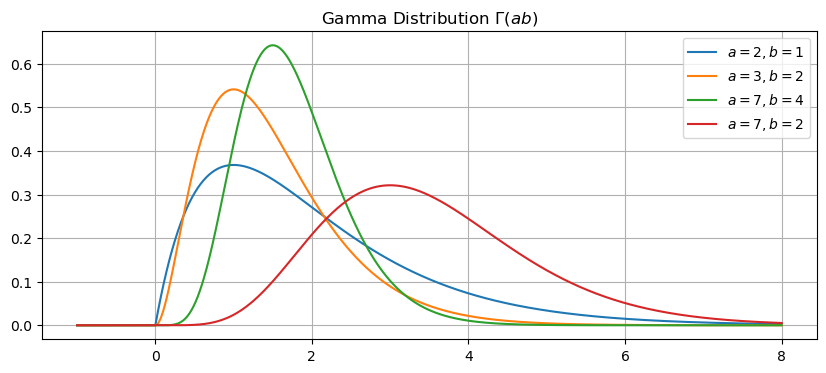

In [9]:
plt.figure(figsize=(10,4))
x = np.linspace(-1,8,1000)
gamma = lambda x,alpha,beta: beta**alpha/sps.gamma(alpha)*x**(alpha - 1)*np.exp(-beta*x)*np.heaviside(x,1)
for alpha,beta in [(2,1),(3,2),(7,4),(7,2)]:
    y = gamma(x,alpha,beta)
    plt.plot(x,y)
plt.title('Gamma Distribution $\Gamma(a b)$')
plt.legend(['$a=2,b=1$','$a=3,b=2$','$a=7,b=4$','$a=7,b=2$'])
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution) for more information.
:::

## Example: Wind Speed Distribution

The file `wind.csv` consists of daily average wind speed measured at the Vancouver Airport from 1995 to 2023. Let's import the data, look the first few rows and then plot the histogram of windspeeds.

In [10]:
df = pd.read_csv('wind.csv')
df.head()

,day,month,year,dayofyear,avg_wind_speed
0,13,4,2023,103,13.0
1,12,4,2023,102,13.0
2,11,4,2023,101,17.5
3,10,4,2023,100,11.5
4,9,4,2023,99,19.5


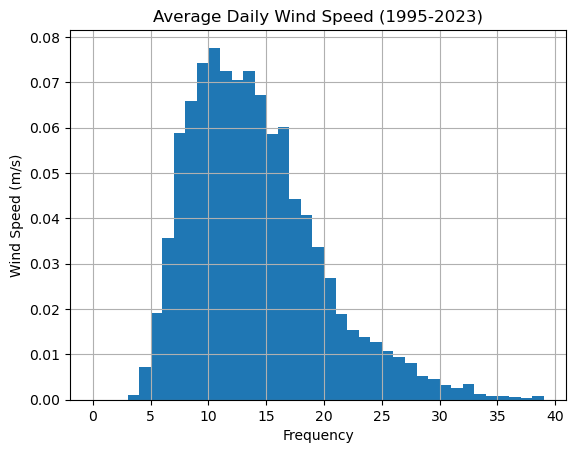

In [11]:
df['avg_wind_speed'].hist(bins=range(40),density=True)
plt.xlabel('Frequency'), plt.ylabel('Wind Speed (m/s)')
plt.title('Average Daily Wind Speed (1995-2023)')
plt.grid(True)
plt.show()

Compute the sample mean and sample variance.

In [12]:
mu = df['avg_wind_speed'].mean()
sigma2 = df['avg_wind_speed'].var()
print('mean =',mu,', variance =',sigma2)

mean = 13.9063 , variance = 33.232443554355434


Compute the parameters $\alpha$ and $\beta$ and plot the distribution:

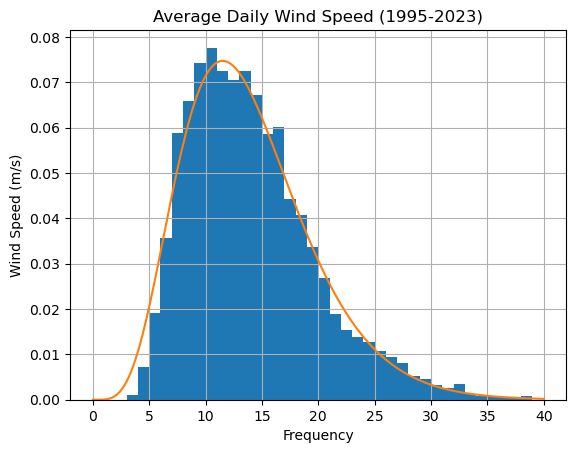

In [13]:
alpha = mu**2/sigma2
beta = mu/sigma2
df['avg_wind_speed'].hist(bins=range(40),density=True)
x = np.linspace(0,40,200)
y = gamma(x,alpha,beta)
plt.plot(x,y)

plt.xlabel('Frequency'), plt.ylabel('Wind Speed (m/s)')
plt.title('Average Daily Wind Speed (1995-2023)')
plt.grid(True)
plt.show()